<a href="https://colab.research.google.com/github/johnnycleiton07/pima-indians-diabetes-dataset/blob/main/Introducao_a_Ciencia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução à Ciência de Dados

Pima Indians Diabetes Database é um conjunto de dados público muito usado em aprendizado de máquina para problemas de classificação binária (diabético vs não-diabético). O dataset contém dados de 768 mulheres Pima índias (Povo indígena do sudoeste dos EUA) com 21 anos ou mais.

#### Referências

1. [Pima Indians Diabetes Database - Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) – Conjunto de dados completo e documentação no Kaggle.
2. [OpenML](https://www.openml.org/search?type=data&id=43483&sort=runs&status=active) – plataforma aberta para compartilhamento de conjuntos de dados.

**Equipe:** *Johnny Cleiton* | *Joss Timoteo* | *Raphael Feitosa*


#### Configurações iniciais do notebook

In [ ]:
# trecho de código para montar o Google Drive no Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# variável representando o caminho do dataset em zip que está no Drive
zip_path = "/content/drive/MyDrive/Classroom/Introdução à Ciência de Dados/Pima Indians Diabetes-20250930T004845Z-1-001.zip"

# descompactação do arquivo zip colocando o dataset em uma pasta específica do Drive
!unzip -o "$zip_path" -d /content/pima_dataset

Archive:  /content/drive/MyDrive/Classroom/Introdução à Ciência de Dados/Pima Indians Diabetes-20250930T004845Z-1-001.zip
  inflating: /content/pima_dataset/Pima Indians Diabetes/diabetes.csv  
  inflating: /content/pima_dataset/Pima Indians Diabetes/Fonte.docx  


## BACKGROUND DO PROJETO

### Possíveis Stakeholders


1. Pacientes;
2. Profissionais de saúde;
3. Hospitais;
4. Planos de saúde;
5. Healthtechs;
6. Órgãos governamentais;
7. Organizações Não Governamentais (ONGs) relacionadas ao tema;
8. Pesquisadores da áre;
9. População fora do grupo de risco.



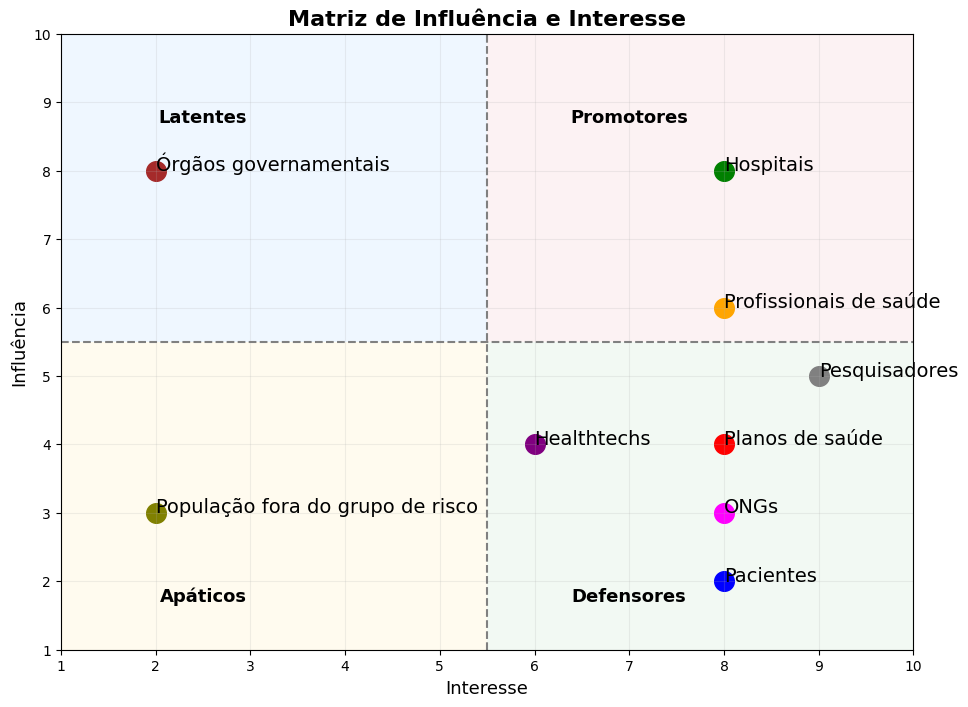

In [ ]:
import matplotlib.pyplot as plt

# Lista de stakeholders
stakeholders = [
    "Pacientes",
    "Profissionais de saúde",
    "Hospitais",
    "Planos de saúde",
    "Healthtechs",
    "Órgãos governamentais",
    "ONGs",
    "Pesquisadores",
    "População fora do grupo de risco"
]

# Valores de interesse e influência
interesse  = [8, 8, 8, 8, 6, 2, 8, 9, 2]
influencia = [2, 6, 8, 4, 4, 8, 3, 5, 3]

# Configurações do gráfico
plt.figure(figsize=(11,8))

# Fundo colorido dos quadrantes
plt.axhspan(5.5, 10, xmin=0, xmax=0.5, facecolor="#cce5ff", alpha=0.3)  # Latentes
plt.axhspan(5.5, 10, xmin=0.5, xmax=1, facecolor="#f8d7da", alpha=0.3)  # Promotores
plt.axhspan(1, 5.5, xmin=0, xmax=0.5, facecolor="#fff3cd", alpha=0.3)  # Apáticos
plt.axhspan(1, 5.5, xmin=0.5, xmax=1, facecolor="#d4edda", alpha=0.3)  # Defensores

# Plota os stakeholders
cores = ["blue","orange","green","red","purple","brown","magenta","gray","olive"]

texts = []
for i, nome in enumerate(stakeholders):
    plt.scatter(interesse[i], influencia[i], s=200, c=cores[i])
    texts.append(plt.text(interesse[i], influencia[i], nome, fontsize=14))

# Linhas de corte
plt.axhline(5.5, color="gray", linestyle="--")
plt.axvline(5.5, color="gray", linestyle="--")

# Títulos dos quadrantes
plt.text(7, 8.7, "Promotores", fontsize=13, ha="center", weight="bold")
plt.text(2.5, 8.7, "Latentes", fontsize=13, ha="center", weight="bold")
plt.text(7, 1.7, "Defensores", fontsize=13, ha="center", weight="bold")
plt.text(2.5, 1.7, "Apáticos", fontsize=13, ha="center", weight="bold")

# Ajustes finais
plt.title("Matriz de Influência e Interesse", fontsize=16, weight="bold")
plt.ylabel("Influência", fontsize=13)
plt.xlabel("Interesse", fontsize=13)
plt.xlim(1, 10)
plt.ylim(1, 10)
plt.grid(alpha=0.2)

plt.show()


### Dicionário de Dados e Principais Atributos

In [ ]:
import pandas as pd

# lê o arquivo CSV e carrega os dados em um DataFrame (df) do pandas
df = pd.read_csv("/content/diabetes.csv")

# mostra as dimensões do DataFrame (n_linhas, n_colunas)
print(df.shape)

(768, 9)


In [ ]:
# exibe as primeiras linhas do DataFrame (as 5 primeiras por padrão)
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
# exibe um resumo rápido do DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


O dicionário de dados apresenta as variáveis do dataset com suas principais características: nome, descrição, tipo de dado e valores possíveis. A variável Outcome é a alvo do estudo, usada para classificação binária (presença ou ausência de diabetes).

<div align="center">

| **Variável**             | **Descrição**                                         | **Tipo de Dado**       | **Valores Possíveis**       |
|---------------------------|-------------------------------------------------------|------------------------|-----------------------------|
| Pregnancies               | Número de vezes que a paciente esteve grávida         | Inteiro                | ≥ 0                         |
| Glucose                   | Concentração de glicose no plasma (teste de tolerância) | Numérico (contínuo)    | ≥ 0 (0 = ausente)           |
| BloodPressure             | Pressão arterial diastólica                           | Numérico (contínuo)    | ≥ 0 (0 = ausente)           |
| SkinThickness             | Espessura da dobra cutânea do tríceps                 | Numérico (contínuo)    | ≥ 0 (0 = ausente)           |
| Insulin                   | Nível de insulina sérica em 2 horas                   | Numérico (contínuo)    | ≥ 0 (0 = ausente)           |
| BMI                       | Índice de Massa Corporal (peso/altura²)               | Numérico (decimal)     | ≥ 0 (0 = ausente)           |
| DiabetesPedigreeFunction  | Função de pedigree de diabetes (risco genético familiar) | Numérico (decimal)   | ~0 a >2                     |
| Age                       | Idade da paciente                                     | Inteiro                | ≥ 0                         |
| Outcome                   | Diagnóstico de diabetes                               | Categórico (binário)   | {0 = não, 1 = sim}          |


</div>



Partindo do uso clássico deste dataset em ciência de dados, que é a previsão do diagnóstico de diabetes, o objetivo principal é identificar, a partir das variáveis clínicas disponíveis, se um paciente apresenta ou não a doença.

Para tornar o modelo mais simples e interpretável, optamos por um conjunto mais enxuto de variáveis, focando apenas naquelas que contribuem de forma mais significativa para a classificação binária do desfecho, Outcome (0 = não diabético, 1 = diabético). Com base em pesquisa, são elas:

<div align="center">

| Atributo                  | Descrição                                                                 |
|----------------------------|---------------------------------------------------------------------------|
| Glucose                    | Principal indicador de diabetes; valores altos estão fortemente associados à doença. |
| BMI (Índice de Massa Corporal) | Obesidade é um fator de risco bem estabelecido para diabetes.             |
| Age (Idade)                | A probabilidade de diabetes aumenta com a idade.                          |
| DiabetesPedigreeFunction   | Mede predisposição genética; ajuda a capturar risco familiar.             |
| Outcome                    | Representa o diagnóstico de diabetes (0 = não, 1 = sim).                  |

</div>


## PRÉ-PROCESSAMENTO

#### Redução de Variáveis

In [ ]:
# mantém apenas as colunas de interesse
df = df[["Glucose", "BMI", "Age", "DiabetesPedigreeFunction", "Outcome"]]

print(df.head())

   Glucose   BMI  Age  DiabetesPedigreeFunction  Outcome
0      148  33.6   50                     0.627        1
1       85  26.6   31                     0.351        0
2      183  23.3   32                     0.672        1
3       89  28.1   21                     0.167        0
4      137  43.1   33                     2.288        1


#### Limpeza

A limpeza será feita em duas etapas:

* O primeiro passo é a exclusão de valores zero que não fazem sentido fisiológico nos atributos clínicos, como Glucose e BMI (índice de massa corporal). Para isso substituímos os valores 0 por NaN para depois tratar no segundo passo.

In [ ]:
import numpy as np

# substitui zeros inválidos por NaN
df[["Glucose", "BMI"]] = df[["Glucose", "BMI"]].replace(0, np.nan)

# verifica quantos nulos ficaram
print(df.isna().sum())

Glucose                      5
BMI                         11
Age                          0
DiabetesPedigreeFunction     0
Outcome                      0
dtype: int64


* O segundo passo é justamente a exclusão desses valores nulos (NaN)

In [ ]:
# remove linhas com qualquer valor nulo nas variáveis selecionadas
df = df.dropna()

print(df.isna().sum())  # confirma se não restaram nulos
print(df.shape)         # verifica quantas linhas sobraram

Glucose                     0
BMI                         0
Age                         0
DiabetesPedigreeFunction    0
Outcome                     0
dtype: int64
(752, 5)


#### Transformação

Essa etapa é para Padronizar as variáveis numéricas para que todos os atributos fiquem na mesma escala. Por exemplo, o atributo Age pode ir até 80, porém o atributo DiabetesPedigreeFunction possui números decimais pequenos indo de 0 a 2, portanto esses atributos não estão na mesma escala e não seriam tratados em igualdade por um modelo de ML.

In [ ]:
# importa a classe que é usada para padronizar features (centrar em 0 e escalar para desvio padrão 1).
from sklearn.preprocessing import StandardScaler

# cria objeto para padronização
scaler = StandardScaler()

# aplica a padronização somente nas variáveis independentes
X = df[["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]]
X_scaled = scaler.fit_transform(X)

# converte de volta para DataFrame para facilitar leitura
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# mantém a variável alvo/resultado separada
y = df["Outcome"]

print(X_scaled.head())

    Glucose       BMI       Age  DiabetesPedigreeFunction
0  0.852119  0.165409  1.426086                  0.466671
1 -1.207994 -0.845521 -0.197622                 -0.369975
2  1.996626 -1.322102 -0.112164                  0.603081
3 -1.077194 -0.628893 -1.052206                 -0.927739
4  0.492416  1.537386 -0.026706                  5.501706


## ANÁLISE DESCRITIVA (GRÁFICOS)



### Histograma

In [ ]:
import plotly.express as px

# histograma de Glucose por diagnóstico
fig = px.histogram(
    df,
    x="Glucose",
    color="Outcome",
    nbins=30,
    barmode="overlay",
    title="Distribuição da Glicose por Diagnóstico de Diabetes"
)
fig.show()



### Gráfico de Dispersão

In [ ]:
import plotly.express as px

fig = px.scatter(
    df,
    x="BMI",
    y="Glucose",
    color="Outcome",
    title="Relação entre IMC (BMI) e Glicose"
)
fig.show()





### Boxplot

In [ ]:
# Boxplot de idade por diagnóstico
fig = px.box(df, x="Outcome", y="Age", color="Outcome",
             title="Distribuição da Idade por Diagnóstico de Diabetes")
fig.show()

## MODELAGEM

Nesta etapa de modelagem, serão aplicados diferentes algoritmos de aprendizado de máquina ao Pima Indians Diabetes Dataset com o intuito de gerar insights sobre os padrões presentes nos dados. Serão utilizados os métodos Árvore de Decisão, K-Means e KNN (K-Nearest Neighbors).

### Árvore de Decisão (Decision Tree)

Acurácia no treino: 0.7585551330798479
Acurácia no teste: 0.7212389380530974


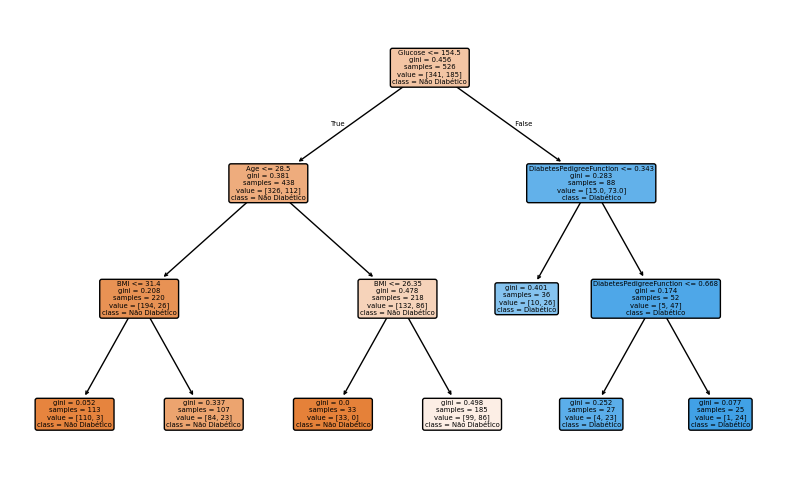

|--- Glucose <= 154.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 31.40
|   |   |   |--- class: 0
|   |   |--- BMI >  31.40
|   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- class: 0
|--- Glucose >  154.50
|   |--- DiabetesPedigreeFunction <= 0.34
|   |   |--- class: 1
|   |--- DiabetesPedigreeFunction >  0.34
|   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |--- class: 1
|   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |--- class: 1



In [ ]:
# importando bibliotecas necessárias
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
import matplotlib.pyplot as plt

# selecionar variáveis escolhidas
X = df[["Glucose", "BMI", "Age", "DiabetesPedigreeFunction"]]
y = df["Outcome"]


# divisão em treino e teste (30% teste, 70% treino)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# criar árvore de decisão
clf = DecisionTreeClassifier(
    criterion="gini",
    max_depth=3,        # limita a 3 níveis de profundidade
    min_samples_leaf=20, # cada folha precisa ter pelo menos 20 amostras
    random_state=42
)
clf.fit(X_train, y_train)

# avaliação
print("Acurácia no treino:", clf.score(X_train, y_train))
print("Acurácia no teste:", clf.score(X_test, y_test))

# mostrar árvore de forma visual
plt.figure(figsize=(10,6))
plot_tree(clf, feature_names=X.columns, class_names=["Não Diabético", "Diabético"],
          filled=True, rounded=True)
plt.show()

# mostrar as regras em texto (bem mais legível)
print(export_text(clf, feature_names=list(X.columns)))


### K-Means

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
# remove Outcome, pois ela é a classe e não queremos dar essa informação na clusterização
X = df.drop('Outcome', axis=1)

In [ ]:
# número de clusters = 2
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# adicionar a coluna de cluster no dataframe
df['Cluster'] = clusters

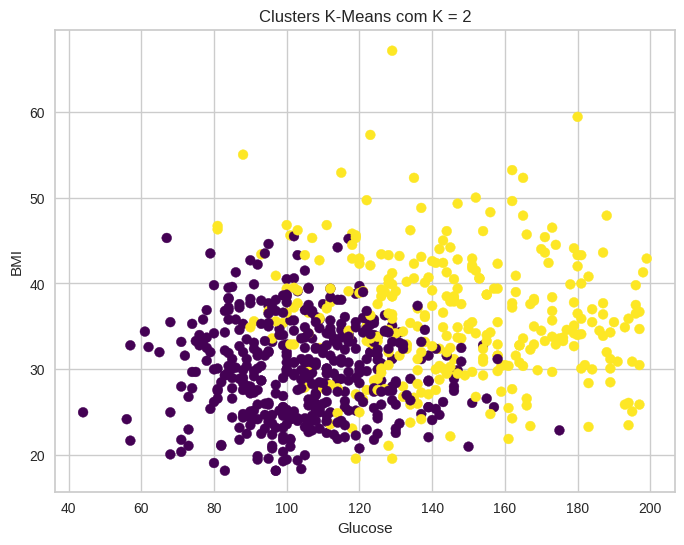

In [ ]:
plt.figure(figsize=(8,6))

# scatter plot
plt.scatter(df['Glucose'], df['BMI'], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Clusters K-Means com K = 2')
plt.show()


Validando o número de K = 2 através do Índice da Silhueta (Silhouette Score).

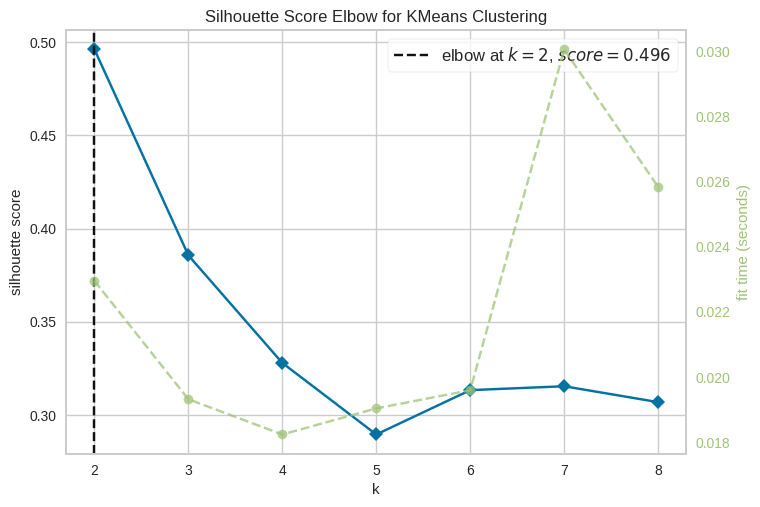

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
# Índice da Silhueta (Silhouette Score)

from yellowbrick.cluster import KElbowVisualizer

# visualização do número ideal de clusters com a métrica de silhueta
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2,9), timings=True, metric='silhouette')

visualizer.fit(X)
visualizer.show()